In [1]:
#import packages
import numpy as np
import pandas as pd #For data wragling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px #for plotting

import nltk
#nltk.download('punkt')
from nltk.stem.porter import PorterStemmer

from sklearn.naive_bayes import MultinomialNB#Multinomial Naive Bayes
from sklearn.metrics import accuracy_score#accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#confusion matrix

import matplotlib.pyplot as plt

In [14]:
#load both train and test data 
data = pd.read_csv("SPAM.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#extract label column
y = data['Category'].to_numpy()

#extract corpus
X = data['Message'].to_numpy()

In [16]:
print(np.unique(y).reshape(-1,1))

[['ham']
 ['spam']]


In [5]:
#vectorize the text data and remove the stop words
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [6]:
TF = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
TFMx = TF.fit_transform(X)
TFMx.shape

/Users/Evensliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop

(5572, 7913)

In [17]:
TF = TfidfVectorizer(stop_words='english')
TFMx = TF.fit_transform(X)
TFMx.shape

(5572, 8440)

In [18]:
TF.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [19]:
#checking Nas
np.isnan(np.sum(TFMx))

False

In [20]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(TFMx, y, test_size=0.3, random_state=42)

In [21]:
#Fit the model
clfr = MultinomialNB()
clfr.fit(X_train, y_train)

MultinomialNB()

In [22]:
#make prediction
y_pred = clfr.predict(X_test)

In [23]:
#Accuracy score
accuracy_score(y_test, y_pred)

0.9712918660287081

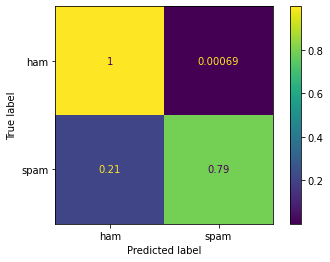

In [24]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clfr.classes_)
disp.plot()
plt.show()